# EDA

# 1. Importing the librarires


In [1]:
#Lets import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# 2.Data Acquisition and Description

In [2]:
#Lets read out dataset
df_path = r'C:\projects\deep_learning\project2\data\raw\train.csv'
data = pd.read_csv(df_path, sep='\t', encoding='utf-8')
print("Shape of Dataset :",data.shape)


Shape of Dataset : (21428, 20)


In [3]:
data.columns

Index(['track_name', 'track_popularity', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_id',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

**Observations**
- We have 21,428 Rows of Data across 20 features.

In [4]:
data.head()

,track_name,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Grow Up (feat. Chikk),55,90's Kid,2015-03-10,Chicano Rap,3o3xRXWMtBMezk0E3wmtGI,latin,latin hip hop,0.714,0.659,5,-7.423,0,0.3070,0.68800,0.000008,0.1280,0.6710,87.119,187587
1,Шлюза за дым,25,Попеременно,2013-11-11,Russian Gangster Rap,0u0qLLE8MZc679RZWCk1TT,rap,gangster rap,0.372,0.653,8,-5.588,0,0.0625,0.03640,0.010200,0.0636,0.0395,84.150,188421
2,"DANI: Bzrp Freestyle Sessions, Vol. 7",71,"DANI: Bzrp Freestyle Sessions, Vol. 7",2019-11-07,Trap Argentino - Trap Argentina,6ltss0ThreZ3uIMn5mr4Tm,rap,trap,0.924,0.622,0,-6.824,1,0.2330,0.09950,0.000000,0.0971,0.7400,130.063,137365
3,Oxygen,46,Teen Beach Movie,2013-01-01,post teen pop,45AKTTGQEfYgAyidW5hucn,pop,post-teen pop,0.592,0.935,4,-3.869,1,0.0584,0.00431,0.000000,0.1390,0.5170,127.967,181693
4,Opowieści z Doliny Smoków,65,Opowieści z Doliny Smoków,2019-10-28,Trap strefa,37i9dQZF1DWY3UKS6jvnxr,rap,trap,0.548,0.579,10,-7.576,0,0.3230,0.18800,0.000000,0.0857,0.2840,113.563,197997


In [5]:
#Lets look at data.info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21428 entries, 0 to 21427
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                21428 non-null  object 
 1   track_popularity          21428 non-null  int64  
 2   track_album_name          21428 non-null  object 
 3   track_album_release_date  21428 non-null  object 
 4   playlist_name             21428 non-null  object 
 5   playlist_id               21428 non-null  object 
 6   playlist_genre            21428 non-null  object 
 7   playlist_subgenre         21428 non-null  object 
 8   danceability              21428 non-null  float64
 9   energy                    21428 non-null  float64
 10  key                       21428 non-null  int64  
 11  loudness                  21428 non-null  float64
 12  mode                      21428 non-null  int64  
 13  speechiness               21428 non-null  float64
 14  acoust

In [6]:
# Lets check for missing values
data.isna().sum().sort_values(ascending=False)

track_name                  0
track_popularity            0
tempo                       0
valence                     0
liveness                    0
instrumentalness            0
acousticness                0
speechiness                 0
mode                        0
loudness                    0
key                         0
energy                      0
danceability                0
playlist_subgenre           0
playlist_genre              0
playlist_id                 0
playlist_name               0
track_album_release_date    0
track_album_name            0
duration_ms                 0
dtype: int64

**Observations**
- No missing values observed 
- We can convert track_album_release_date dtype from object to datetime.


In [7]:
#Lets see data discription
description = data.describe()

In [8]:
# Convert the description DataFrame to LaTeX format
latex_table = description.to_latex(index=True, float_format="%.2f")

# Save the LaTeX table to a file
with open('description_table.tex', 'w') as file:
    file.write(latex_table)

# Alternatively, you can print it to directly use in your LaTeX document
print(latex_table)


\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
 & track_popularity & danceability & energy & key & loudness & mode & speechiness & acousticness & instrumentalness & liveness & valence & tempo & duration_ms \\
\midrule
count & 21428.00 & 21428.00 & 21428.00 & 21428.00 & 21428.00 & 21428.00 & 21428.00 & 21428.00 & 21428.00 & 21428.00 & 21428.00 & 21428.00 & 21428.00 \\
mean & 44.28 & 0.66 & 0.67 & 5.38 & -7.02 & 0.58 & 0.11 & 0.20 & 0.05 & 0.19 & 0.54 & 119.73 & 226668.72 \\
std & 24.99 & 0.15 & 0.18 & 3.62 & 3.05 & 0.49 & 0.11 & 0.23 & 0.18 & 0.15 & 0.23 & 28.71 & 57745.82 \\
min & 0.00 & 0.08 & 0.00 & 0.00 & -46.45 & 0.00 & 0.02 & 0.00 & 0.00 & 0.01 & 0.00 & 35.48 & 29493.00 \\
25% & 27.00 & 0.56 & 0.55 & 2.00 & -8.51 & 0.00 & 0.04 & 0.02 & 0.00 & 0.09 & 0.36 & 96.54 & 190191.25 \\
50% & 48.00 & 0.68 & 0.69 & 6.00 & -6.46 & 1.00 & 0.06 & 0.10 & 0.00 & 0.12 & 0.54 & 117.94 & 218933.00 \\
75% & 64.00 & 0.77 & 0.81 & 9.00 & -4.89 & 1.00 & 0.14 & 0.30 & 0.00 & 0.24 & 0.71 & 137.31 & 255392.50 \\

**Observations**
- track_popularity Ranges from 0-100. Average track popularity is 44.28.
- 25% of the track has popularity value above 62.
- avg. daceability value of songs in our dataset has value around 0.65
- avg. energy level of a song is 0.70. 25% of songs have an energy level above 0.84.
- Mean songs duration is 226668ms which is 3,77 minutes. 
- We have a song which is 517810 ms long which is 8.63 minutes long.Surely we have an outleir in this feature. (We will see which song is this)

In [86]:
#Lets check for duplicate rows of data
data.duplicated().any()

False

**Observations**
- We dont have any duplicate rows in our dataset.

# 3.Data Preprocessing

In [82]:
data['track_album_release_date'].value_counts()

track_album_release_date
2020-01-10    158
2010-01-01    156
2008-01-01    151
2012-01-01    136
2005-01-01    133
             ... 
2005-03-07      1
2016-01-05      1
2018-03-08      1
1975-04-08      1
2007-10-02      1
Name: count, Length: 3893, dtype: int64

In [92]:
# Lets extract release year
data['album_release_year'] = pd.DatetimeIndex(data['track_album_release_date']).year

In [93]:
# Lets extract release month
data['album_release_month'] = pd.DatetimeIndex(data['track_album_release_date']).month

In [94]:
data.head()

,track_name,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month
0,Grow Up (feat. Chikk),55,90's Kid,2015-03-10,Chicano Rap,3o3xRXWMtBMezk0E3wmtGI,latin,latin hip hop,0.714,0.659,5,-7.423,0,0.3070,0.68800,0.000008,0.1280,0.6710,87.119,187587,2015,3
1,Шлюза за дым,25,Попеременно,2013-11-11,Russian Gangster Rap,0u0qLLE8MZc679RZWCk1TT,rap,gangster rap,0.372,0.653,8,-5.588,0,0.0625,0.03640,0.010200,0.0636,0.0395,84.150,188421,2013,11
2,"DANI: Bzrp Freestyle Sessions, Vol. 7",71,"DANI: Bzrp Freestyle Sessions, Vol. 7",2019-11-07,Trap Argentino - Trap Argentina,6ltss0ThreZ3uIMn5mr4Tm,rap,trap,0.924,0.622,0,-6.824,1,0.2330,0.09950,0.000000,0.0971,0.7400,130.063,137365,2019,11
3,Oxygen,46,Teen Beach Movie,2013-01-01,post teen pop,45AKTTGQEfYgAyidW5hucn,pop,post-teen pop,0.592,0.935,4,-3.869,1,0.0584,0.00431,0.000000,0.1390,0.5170,127.967,181693,2013,1
4,Opowieści z Doliny Smoków,65,Opowieści z Doliny Smoków,2019-10-28,Trap strefa,37i9dQZF1DWY3UKS6jvnxr,rap,trap,0.548,0.579,10,-7.576,0,0.3230,0.18800,0.000000,0.0857,0.2840,113.563,197997,2019,10


In [25]:
# Now lets do some Exploratory Data Analysis

# 4.Exploratory Data Analysis

#### **Uni-variate Analysis**

**Question**: How many unique songs are there in the dataset

**Observations**
- We have 28352 Unique Songs in the dataset.

**Question**: What is the Distribution of Genre in the Data? Which genre has maximum songs? 

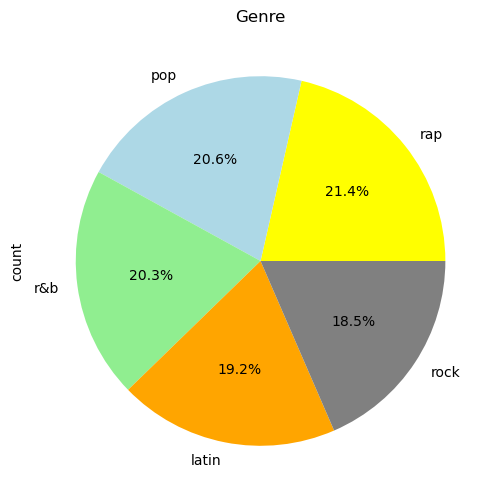

In [85]:
# Define custom colors for the slices
custom_colors = ['yellow', 'lightblue', 'lightgreen', 'orange', 'grey','blue',]
paper = plt.figure(figsize=[10,6])
data['playlist_genre'].value_counts().plot.pie(autopct='%3.1f%%',colors=custom_colors)
plt.title('Genre')
plt.show()

**Observations**
- We have more or less equal music genre distribution over all data observations !

**Question**: Which subgenre is most seen in our Dataset?

In [36]:
data['playlist_subgenre'].value_counts()

playlist_subgenre
southern hip hop      1343
neo soul              1339
indie poptimism       1338
latin hip hop         1315
hard rock             1209
gangster rap          1177
urban contemporary    1100
electropop            1094
dance pop             1060
hip hop               1057
tropical              1037
classic rock          1032
trap                  1017
latin pop             1011
hip pop                996
post-teen pop          914
new jack swing         910
permanent wave         875
album rock             845
reggaeton              759
Name: count, dtype: int64

**Question**: What is the distribution of the following features - **danceability,energy,loudness,speechiness,acousticness,instrumentalness, liveness,valence and tempo**

In [87]:
def plot_all_columns(data, columns):
    # Determine the number of rows and columns for the grid layout
    n_cols = 2  # Each feature will have two plots (boxplot and distplot)
    n_rows = len(columns)  # One row per column
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows), 
                             gridspec_kw={'wspace': 0.4, 'hspace': 0.6})
    
    # Loop through each column and plot
    for i, col in enumerate(columns):
        sns.boxplot(data=data, x=col, ax=axes[i, 0])
        axes[i, 0].set_title(f'Boxplot of {col}')
        
        sns.histplot(data[col], kde=True, ax=axes[i, 1], color='#ff4125')  # Updated to `sns.histplot`
        axes[i, 1].set_title(f'Distribution of {col}')
    
    # Adjust the layout to prevent overlap
    plt.tight_layout()
    plt.show()


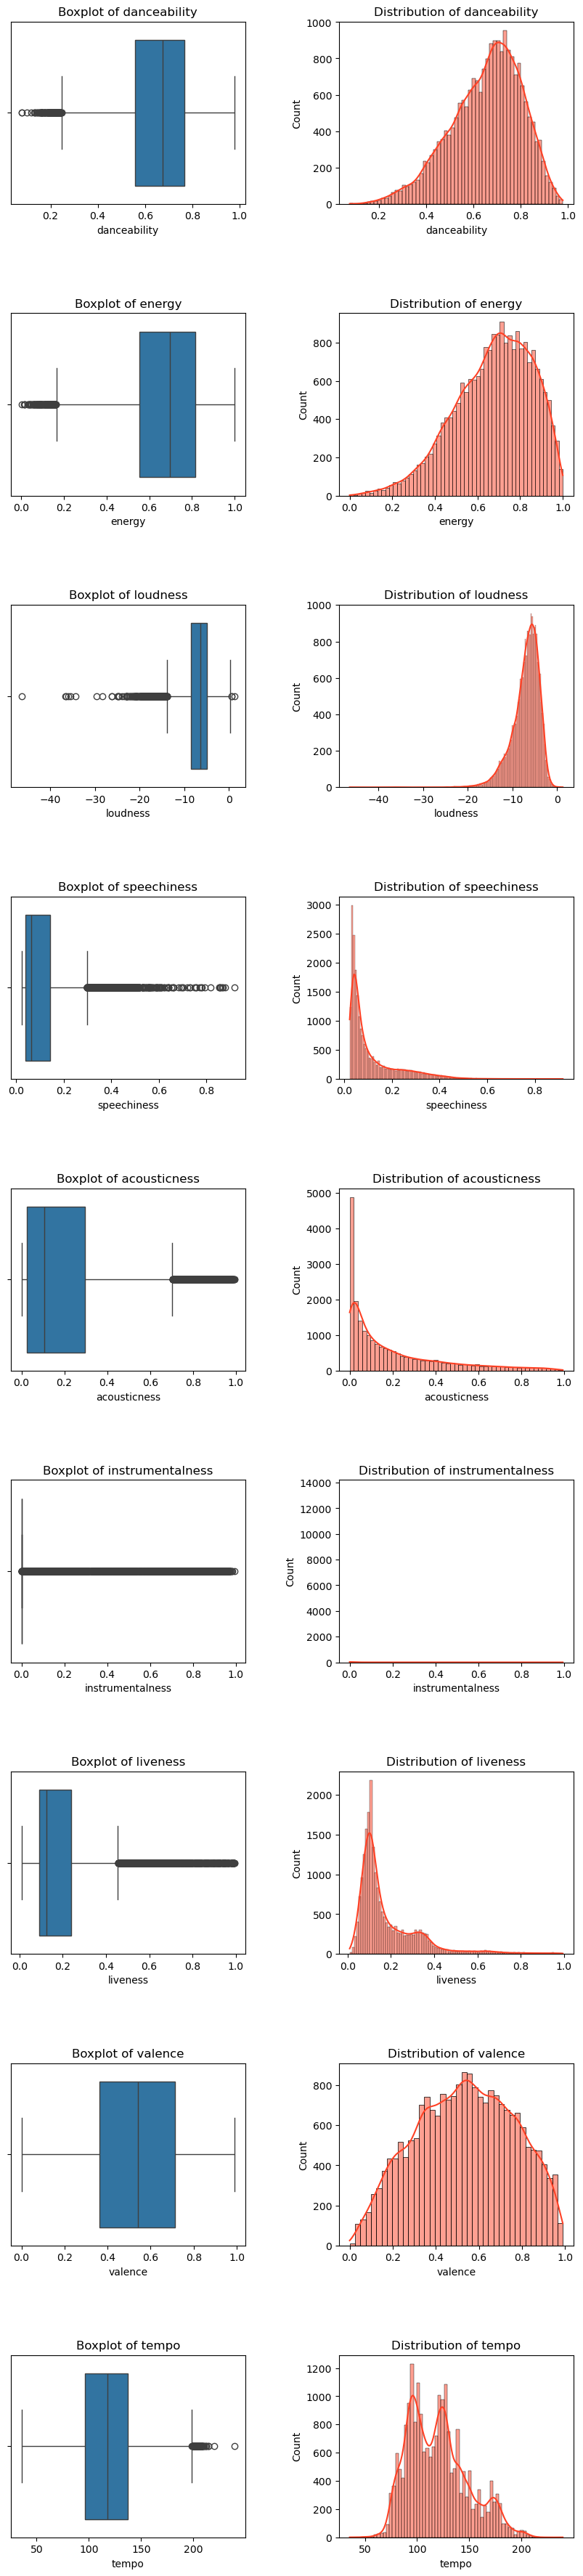

In [88]:
columns_to_plot = [
    'danceability', 'energy', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

# Call the function with your dataset
plot_all_columns(data, columns_to_plot)


**Observations**

- **danceability** feature has few outliers on the left side of the bell shaped curve. Most songs have a danceability value between 0.5 and 0.8. Few songs have 0 danceability value. 
- **energy** feature has also few outliers on the lower side. Few songs have a energy level of 1(Very High).
- Most songs in our playlist have a **loudness** of -10 to 0 decibels. Few songs with less than -10 loudness.
-  Most songs in our Dataset have a **speechiness** of 0.0 - 0.2 which means most of the songs have more of music and non-speech like tracks. Few tracks have very high speechiness of 0.91 which shows these tracks are either talk shows or poetry.
- Mostlt tracks have **acousticness** value between 0 and 0.2. Few tracks have a acousticness of 0.99.
-   **Instrumentaless** and **liveness** has also few outliers on the right side of the curve.
- **valence** is almost normally distributed.
- We have both type of tracks which have very less and very high **tempo** in our dataset. 

**Question**: Which year has the most Release?

In [89]:
print(data['album_release_year'].max())
print(data['album_release_year'].min())

2020
1957


In [51]:
# Lets see which year has how many release
data['album_release_year'].value_counts()

album_release_year
2019    5419
2018    2023
2017    1539
2016    1281
2015    1066
        ... 
1960       4
1963       4
1962       2
1957       1
1961       1
Name: count, Length: 62, dtype: int64

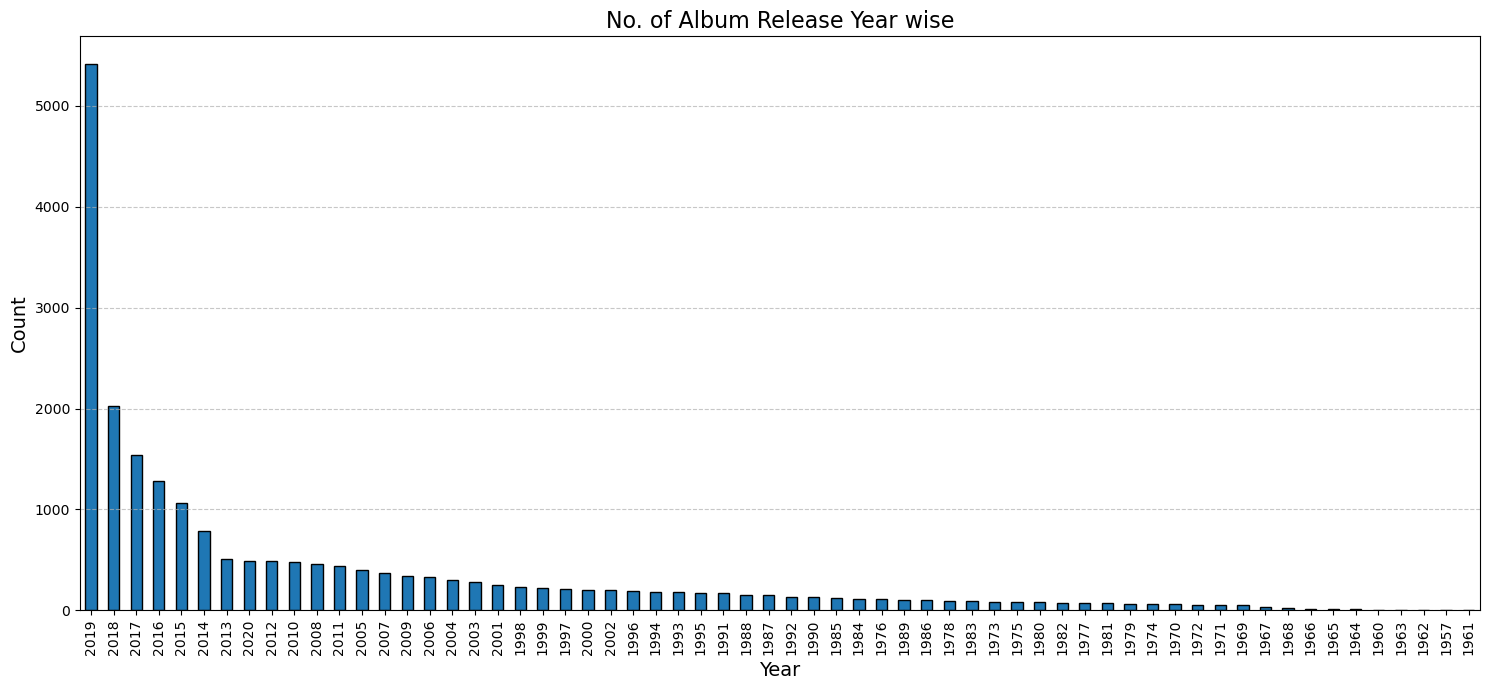

In [100]:
# Lets plot a bar chart
paper = plt.figure(figsize=(15,7))
data['album_release_year'].value_counts().sort_values(ascending=False).plot.bar(edgecolor='black')
plt.xlabel('Year',size=14)
plt.ylabel('Count',size=14)
plt.title('No. of Album Release Year wise',size=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observations**
- We have the data between **1957 and 2020.**
- Maximum songs in our Dataset was released in **2019 followed by 2018,2017,2016 and so on.**


**Question**: Which month of the year has the maximum release?

In [53]:
# Let's see which month has the maximum release
data['album_release_month'].value_counts().sort_index()

album_release_month
1     4982
2     1024
3     1251
4     1226
5     1415
6     1512
7     1302
8     1490
9     1650
10    1972
11    2151
12    1453
Name: count, dtype: int64

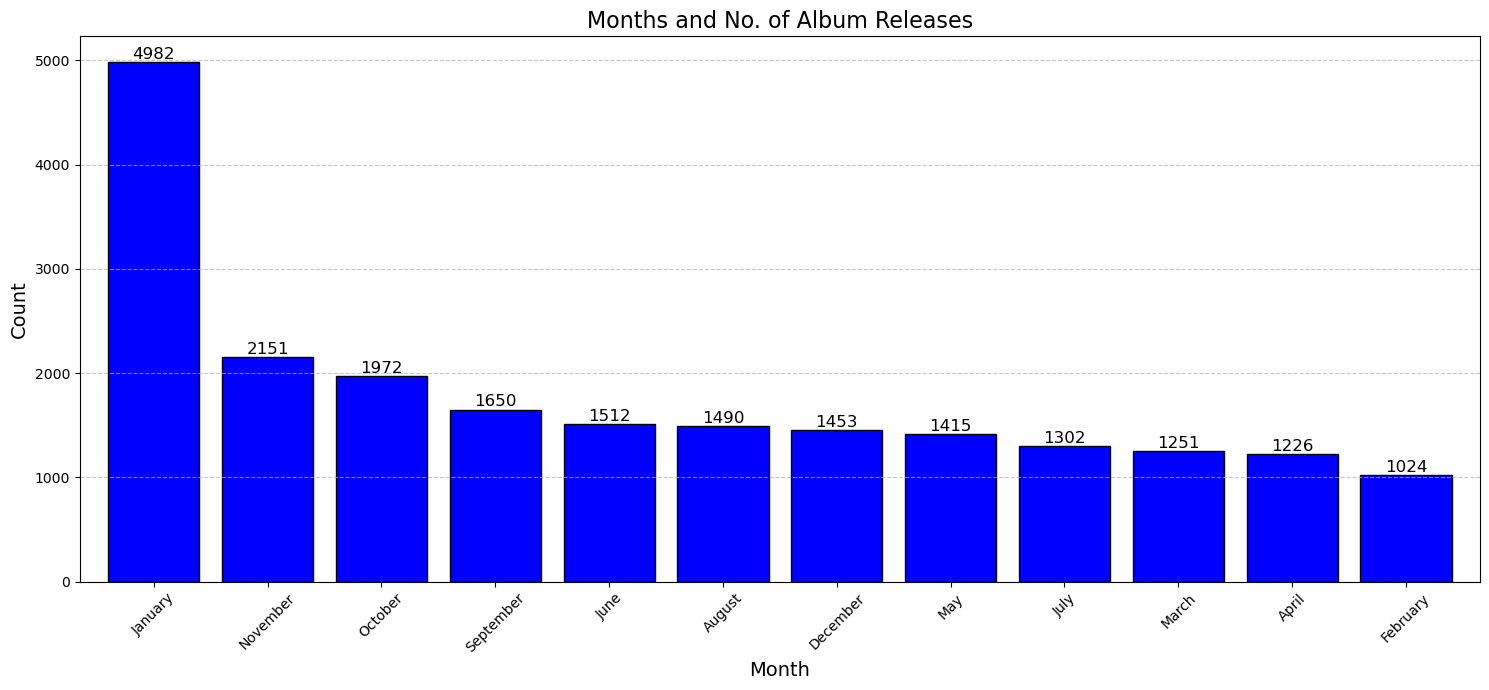

In [105]:
# Mapping numbers to month names
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Sort the month column in chronological order and get the counts
month_counts = data['album_release_month'].value_counts().sort_index()

# Sort the counts by values (descending) and map the sorted indices to month names
sorted_month_counts = month_counts.sort_values(ascending=False)
sorted_month_names = [month_map[month] for month in sorted_month_counts.index]

# Plot the bar graph
plt.figure(figsize=(15, 7))
sorted_month_counts.plot.bar(color='blue', edgecolor='black', width=0.8)

# Label the axes
plt.xlabel('Month', size=14)
plt.ylabel('Count', size=14)
plt.title('Months and No. of Album Releases', size=16)

# Set the x-ticks to the sorted month names
plt.xticks(ticks=range(len(sorted_month_counts)), labels=sorted_month_names, rotation=45)

# Grid for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate with count values above the bars
for i, count in enumerate(sorted_month_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)

# Layout adjustment
plt.tight_layout()
plt.show()


**Observations**
- First month of the year i.e. **January has the maximum release followed by November,October and September.**

#### **Bi-variate Analysis**

In [57]:
# Before jumping to the Bi-variate questions lets look at the heatmap
# Lets create a correlation matrix for all numeric columns
num_col = data.select_dtypes(exclude='object')

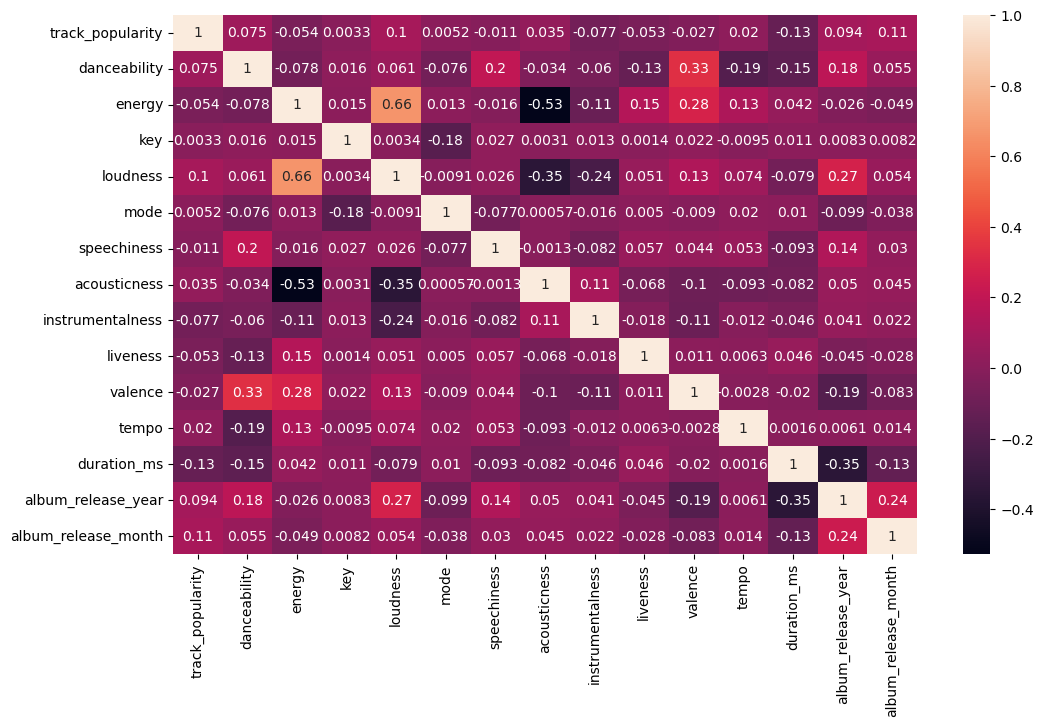

In [58]:
#Now lets plot a Heatmap
plt.figure(figsize=(12,7))
sns.heatmap(num_col.corr(),annot=True)
plt.show()

**Observations**
- **energy** and **loudness** are corelated.
- **acousticness** have a negative co-relation with **energy and loudness**. 
- Other variables are not very correlated !

**Question**: Which track is the most and least popular in terms of popularity? Which singer is associated with the most popular track? 

In [59]:
#Lets see which track is most popular
most_popular_index = data['track_popularity'].idxmax()
most_popular_track = data.loc[most_popular_index, 'track_name']

In [60]:
# Now lets see which track is least popular
least_popular_index = data['track_popularity'].idxmin()
least_popular_track = data.loc[least_popular_index, 'track_name']

In [61]:
#Lets print both most popular and least popular track
print(f"The most popular track is: {most_popular_track} with popularity {data.loc[most_popular_index, 'track_popularity']}")
print(f"The least popular track is: {least_popular_track} with popularity {data.loc[least_popular_index, 'track_popularity']}")

The most popular track is: Dance Monkey with popularity 100
The least popular track is: Change with popularity 0


**Observations**:
- The most popular track is **Dance Monkey** with popularity of 100.
- The least popular track is **Siren** with popularity 0 :-(
- **Tones and I** is the singer associated with the most popular song **Dance Moneky.**

**Question**: Which are the top 10 track_artist is terms of mean_track_popularity?

In [63]:
data.head()

,track_name,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month
0,Grow Up (feat. Chikk),55,90's Kid,2015-03-10,Chicano Rap,3o3xRXWMtBMezk0E3wmtGI,latin,latin hip hop,0.714,0.659,5,-7.423,0,0.3070,0.68800,0.000008,0.1280,0.6710,87.119,187587,2015,3
1,Шлюза за дым,25,Попеременно,2013-11-11,Russian Gangster Rap,0u0qLLE8MZc679RZWCk1TT,rap,gangster rap,0.372,0.653,8,-5.588,0,0.0625,0.03640,0.010200,0.0636,0.0395,84.150,188421,2013,11
2,"DANI: Bzrp Freestyle Sessions, Vol. 7",71,"DANI: Bzrp Freestyle Sessions, Vol. 7",2019-11-07,Trap Argentino - Trap Argentina,6ltss0ThreZ3uIMn5mr4Tm,rap,trap,0.924,0.622,0,-6.824,1,0.2330,0.09950,0.000000,0.0971,0.7400,130.063,137365,2019,11
3,Oxygen,46,Teen Beach Movie,2013-01-01,post teen pop,45AKTTGQEfYgAyidW5hucn,pop,post-teen pop,0.592,0.935,4,-3.869,1,0.0584,0.00431,0.000000,0.1390,0.5170,127.967,181693,2013,1
4,Opowieści z Doliny Smoków,65,Opowieści z Doliny Smoków,2019-10-28,Trap strefa,37i9dQZF1DWY3UKS6jvnxr,rap,trap,0.548,0.579,10,-7.576,0,0.3230,0.18800,0.000000,0.0857,0.2840,113.563,197997,2019,10


**Observations**:
- **Trevor Daniel** is the most popular artist in terms of mean popularity followed by **Y2K, Don Toliver, Roddy Ricch** and so on 

**Question**: Which is the most popular genre?

In [65]:
# Let's see the most popular genre
most_popular_genre = data.groupby(by= 'playlist_genre')['track_popularity'].sum().sort_values(ascending=False)
most_popular_genre

playlist_genre
pop      212443
rap      198369
latin    193657
r&b      179417
rock     164975
Name: track_popularity, dtype: int64

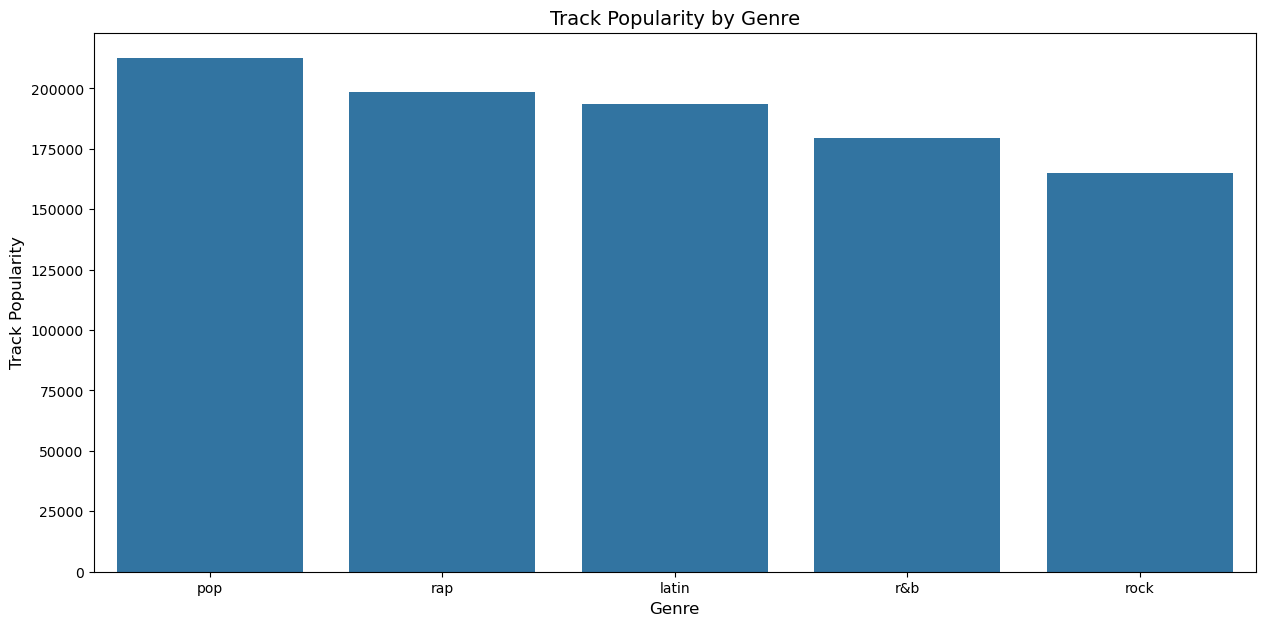

In [66]:
# Let's plot a Bar Graph
paper = plt.figure(figsize=(15,7))
sns.barplot(x=most_popular_genre.index,y=most_popular_genre.values )
plt.xlabel('Genre',size=12)
plt.ylabel('Track Popularity',size=12)
plt.title('Track Popularity by Genre',size=14)
plt.show()

**Observations**:
- **pop** is the most popular genre followed by **rap,latin,r&b,edm and rock**.

In [67]:
data.columns

Index(['track_name', 'track_popularity', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_id',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'album_release_year',
       'album_release_month'],
      dtype='object')

**Question**: Among the various music genres, which genres tend to exhibit higher levels of danceability

In [68]:
# LEt's see which genre has the higest level of danceability
genre_avg_danceability = data.groupby(by='playlist_genre')['danceability'].mean().sort_values(ascending=False)
genre_avg_danceability

playlist_genre
rap      0.718456
latin    0.713771
r&b      0.670793
pop      0.639553
rock     0.521226
Name: danceability, dtype: float64

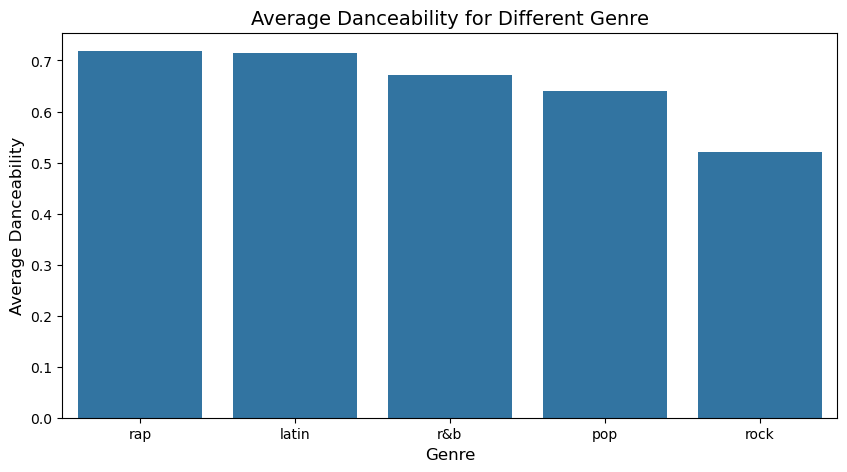

In [69]:
# Lets plot them
paper = plt.figure(figsize=(10,5))
sns.barplot(x=genre_avg_danceability.index,y=genre_avg_danceability.values)
plt.xlabel('Genre',size=12)
plt.ylabel('Average Danceability',size=12)
plt.title('Average Danceability for Different Genre',size=14)
plt.show()

**Observations**:
- **rap** has the highest average danceability value followed by **latin,r&b,edm,pop and rock**
- Higher level of Danceability means genre is suitable for Dancing.

**Question**: Which genre has the highest average Energy level? Also which song has the highest Energy Level ?

In [70]:
# Let's see which genre has the higest average level of Energy
genre_avg_energy = data.groupby(by='playlist_genre')['energy'].mean().sort_values(ascending=False)
genre_avg_energy

playlist_genre
rock     0.733312
latin    0.709231
pop      0.700773
rap      0.648792
r&b      0.587737
Name: energy, dtype: float64

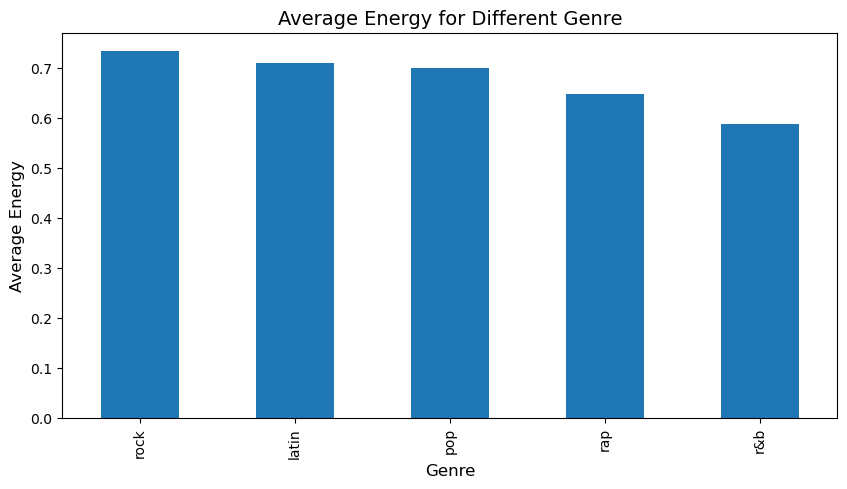

In [71]:
# Lets plot them
paper = plt.figure(figsize=(10,5))
genre_avg_energy.plot.bar()
plt.xlabel('Genre',size=12)
plt.ylabel('Average Energy',size=12)
plt.title('Average Energy for Different Genre',size=14)
plt.show()

#### **Multi-variate Analysis**

**Question:** How does the combination of 'energy', 'danceability', and 'valence' vary across different 'playlist_genre'?

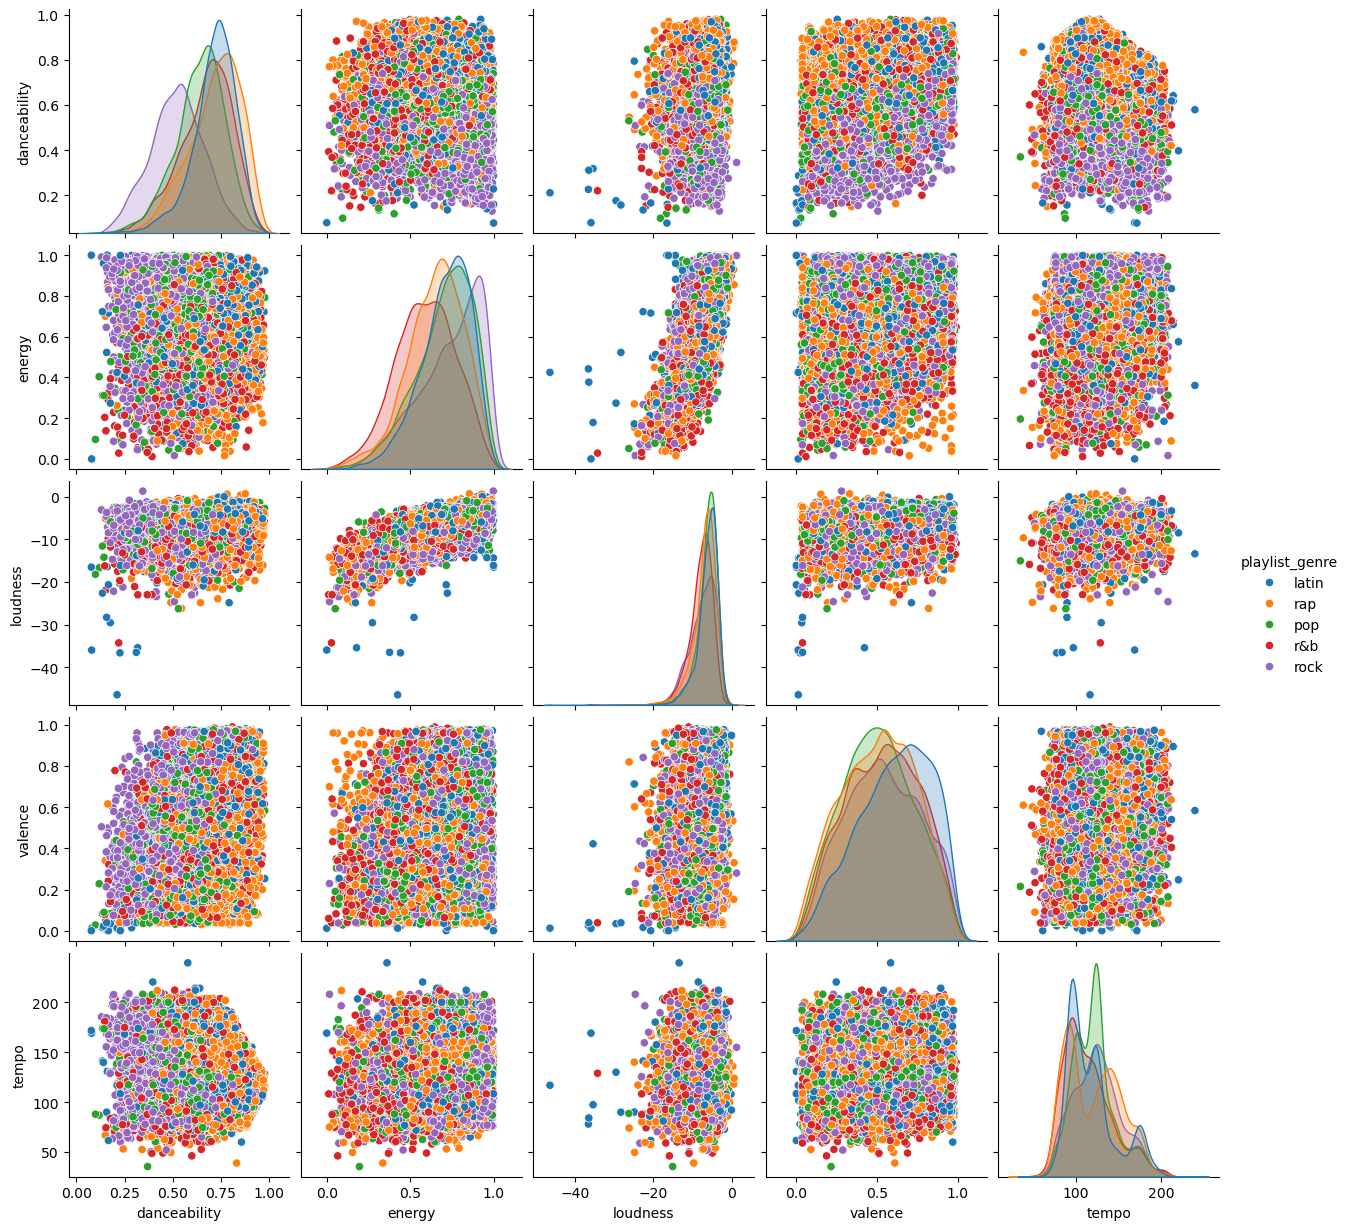

In [107]:
sns.pairplot(data, vars=['danceability', 'energy', 'loudness', 'valence', 'tempo'], hue='playlist_genre')
plt.show()


**Observations**:
- **edm** songs tends to be more energetic and have a higher valence and **r&b** genre songs tends to be least energetic. 
- **latin** genre is most suitable for dancing.
- Few **rap** songs are very less energetic, few of them have very high **danceability** and **valence**

## tSNE

In [116]:
# num_col = data.select_dtypes(exclude='object')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_col)

# If target variable is categorical, encode it
target = data['playlist_genre']


In [117]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200, verbose=1)
X_tsne = tsne.fit_transform(X_scaled)


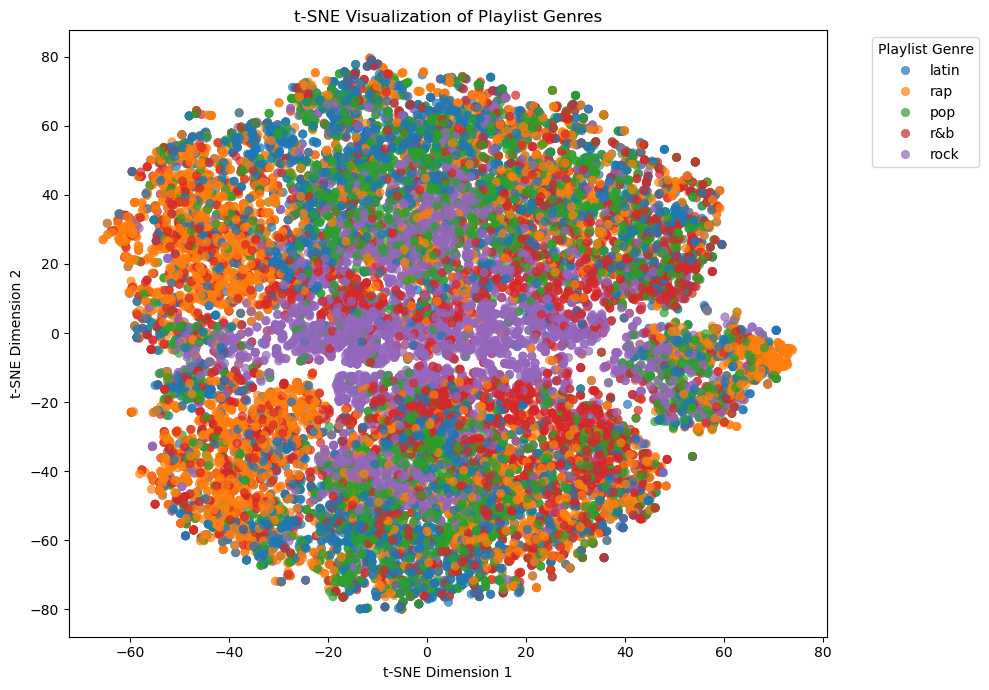

In [119]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X_tsne[:, 0], y=X_tsne[:, 1], hue=target,
    palette='tab10', alpha=0.7, edgecolor=None
)
plt.title("t-SNE Visualization of Playlist Genres")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title='Playlist Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 5.Conclusion 

- We have done Exploratory Data analysis for different features.
- **Martin Garrix** has the maximum number of Songs in the dataset followed by **Queen,The Chainsmokers,David Guetta etc.**
- **18.4%** of tracks in our dataset is of **'edm'** genre.
- **17.5%** of tracks are from **'rap'** genre.
- **progressive electro house** subgenre has the maximum songs followed by **southern hip hop, indie poptimism and so on.
- **danceability** feature has few outliers on the left side of the bell shaped curve. 
- Most songs have a **danceability value between 0.5 and 0.8. Few songs have 0 danceability value.**
- energy feature has also few outliers on the lower side. Few songs have a energy level of 1(Very High).
- Most songs in our playlist have a loudness of -10 to 0 decibels. Few songs with less than -10 loudness.
- Most songs in our Dataset have a **speechiness of 0.0 - 0.2** which means most of the songs have more of music and non-speech like tracks. Few tracks have very high speechiness of 0.91 which shows these tracks are either talk shows or poetry.
- Mostlt tracks have **acousticness value between 0 and 0.2.** Few tracks have a acousticness of 0.99.
- **Instrumentaless and liveness** has also few outliers on the right side of the curve.
- valence is almost normally distributed.
- We have both type of tracks which have very less and very high tempo in our dataset.
- We have the data between **1957 and 2020.**
- Maximum songs in our Dataset was released in **2019 followed by 2018,2017,2016 and so on.**
- **First month of the year i.e. January has the maximum release followed by November,October and September.**
- **energy and loudness are corelated.**
- **acousticness have a negative co-relation with energy and loudness.**
- The most popular track is **Dance Monkey with popularity of 100.
- The least popular track is **Siren with popularity 0 :-(
- **Tones and I** is the singer associated with the **most popular song Dance Moneky.**
- **Trevor Daniel** is the most popular artist in terms of mean popularity followed by **Y2K, Don Toliver, Roddy Ricch** and so on
- **pop is the most popular genre followed by rap,latin,r&b,edm and rock.**
- **rap has the highest average danceability value followed by latin,r&b,edm,pop and rock.**
- Higher level of Danceability means genre is suitable for Dancing.
- **edm has the highest average energy level followed by rock,latin,pop,rap and r&b.**
- The song with the highest energy level is **Rain Forest and Tropical Beach Sound in the latin genre with an energy level of 1.00.**
- **edm songs tends to be more energetic and have a higher valence and r&b genre songs tends to be least energetic.**
- **latin genre is most suitable for dancing.**
- **Few rap songs are very less energetic, few of them have very high danceability and valence.**
- **Most of the tracks have a loudness between -20db to 0db.**
- **Tracks which have loudness closer to 1 generally seen to have High Energy.**
- **Majority of tracks have a tempo of 100 - 200.**
- **Tracks having higher loudness and high tempo are generally Energetic Tracks.**